### Univariate and Bivariate statistics -
In this notebook we will look at what are Univariate and Bivariate statistics and understand their significance in statistics.

Full disclosure that the definitions and notes in the following sections were taken from the book - ["Forecasting Principles and Practice"](https://www.otexts.org/fpp) by Ron J Hyndman and George Athanasopoulos, It's a Comprehensive introduction to the latest forecasting methods using R. 
In this notebook we will look at Univariate Statistics and Bivariate Statistics. Both are methods to analyze and describe the data with a summary statistic. A summary number calculated from the data is called a statistic.

- Univariate Descriptive Statistics:
For a single data set, the most widely used statistics are the average and median. Following are a list of the different types of univariate statistic -
  - Mean
  - Median
  - Mode
  - Variance
  - Standard Deviation
  - Inter Quartile Range

- BiVariate Statistics:
Here's a couple of bivariate statistics that are used to measure the relationship between two variables.
  - Covariance
  - Correlation Coefficient
  
In the following code blocks let's take a look at each of the above mentioned methods.


- Population Mean
  -  This is the average of an entire dataset, For example to calculate the Average height of all men above 35 in the USA.
  
- Sample Mean
  - While it will be a daunting task to calculate the avarege height of all men above the age of 35 in the USA, but it will be relatively easier to poll a subset (read) of the population, provided the sample is a good representaiton of the general population.
  \begin{align}
  \bar{x}=1/N\sum_{i=1}^{n}xi
  \end{align}
 where N denotes the total number of observations

The wing_lengths variable is a list that contains the length of the wings of a house fly in millimeters. In the next code cells we will be working with this dataset to calculate the univariate statistics.


In [17]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline

In [19]:
wing_lengths = [36, 37, 38, 38, 39, 39, 40, 40, 40, 40, 41, 41, 41, 41, 41, 41, 42, 42, 42, 42, 42, 42, 42, 43, 43, 43, 43, 43, 43, 43, 43, 44, 44, 44, 44, 44, 44, 44, 44, 44, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 47, 47, 47, 47, 47, 47, 47, 47, 47, 48, 48, 48, 48, 48, 48, 48, 48, 49, 49, 49, 49, 49, 49, 49, 50, 50, 50, 50, 50, 50, 51, 51, 51, 51, 52, 52, 53, 53, 54, 55]
wing_mean = np.mean(wing_lengths)
wing_median = np.median(wing_lengths)
wing_mode = stats.mode(wing_lengths)
print(wing_mode)
print("Mean of wing lengths - {}".format(wing_mean))
print("Median of wing lengths - {}".format(wing_median))
print("Mode of wing lengths - {}".format(wing_mode))

ModeResult(mode=array([45]), count=array([10]))
Mean of wing lengths - 45.5
Median of wing lengths - 45.5
Mode of wing lengths - ModeResult(mode=array([45]), count=array([10]))


The mean and the median of this dataset is the same at 45.5.

Let's plot the histogram and the mean for the wing_lengths dataset


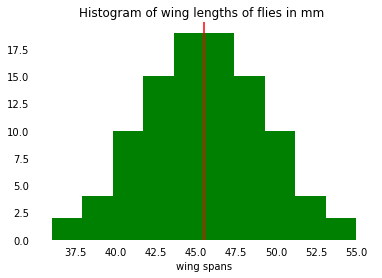

In [21]:
plt.hist(wing_lengths, bins=10, color="g")
plt.axvline(wing_mean, color="r")
plt.xlabel("wing spans")
plt.title("Histogram of wing lengths of flies in mm ")
# To improve the data-ink ratio we will remove the ticks from both axes
# We also want to remove the spines to tell a compelling story
ax = plt.gca()
ax.tick_params(bottom = "off", left="off")
spines = ax.spines
for k,spine in spines.items():
    spine.set_visible(False)
plt.show()

#### Variance
The formula to calculate the variance is -
\begin{equation*}
{var}=1/N\sum_{i=1}^n(xi-\bar{x})^2
\end{equation*}
_ Where N is the total number of observations and x bar is the mean _

In [24]:
# write a function to calculate the variance of a dataset, assume the input will be a list
def calc_variance(data):
    mean = np.mean(data)
    return np.mean([(x-mean)**2 for x in data])
wing_length_variance = calc_variance(wing_lengths)
print("The variance of the wing length dataset is {}".format(wing_length_variance))

The variance of the wing length dataset is 15.21


#### Standard deviation
The standard deviation gives an idea how much spread there is in the data around the mean.
The formula to calculate the standard deviation is -
\begin{equation*}
\sigma=\sqrt{1/N\sum_{i=1}^n(xi-\bar{x})^2}
\end{equation*}
_ Which is the square root of the variance _
\begin{equation*}
\sigma=\sqrt{var}
\end{equation*}

In [27]:
# we can use the calc_variance method to calculate the standard deviation
std_dev = calc_variance(wing_lengths)**(1/2)
print("Standard deviation of the wing length dataset is {}".format(std_dev))

# lets validate the answer by using the numpy method
std_dev_numpy = np.std(wing_lengths)
print("Standard deviation of the wing length dataset using numpy {}".format(std_dev_numpy))

Standard deviation of the wing length dataset is 3.9
Standard deviation of the wing length dataset using numpy 3.9
